# why seaborn :
- from statistical point of it
- from more interactivity

# types of plots 

- numeric plots
   - line plot
   - scatter plot
   -  boxplot
- categorical plots
  - countplot
  - barplot
  - strip
  - swarm plot
  - boxplot
  - violin plot
- distrinution plot
  - distplot
- heatmap

# numeric plot

## scatter plot:
- relplot: figure level based function
- scatterplot: axes level based

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tip=sns.load_dataset("tips")

In [3]:
tip.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# see the relation between total bill and tip

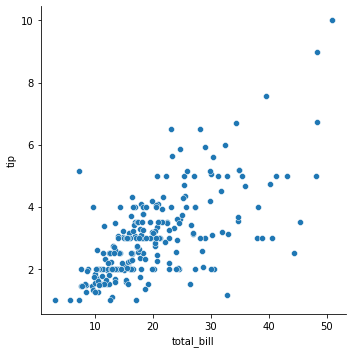

In [5]:
sns.relplot(x="total_bill",y="tip",data=tip);

# insight 

In [9]:
s=tip[["total_bill","tip"]].corr()
s

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# heatmap

<AxesSubplot:>

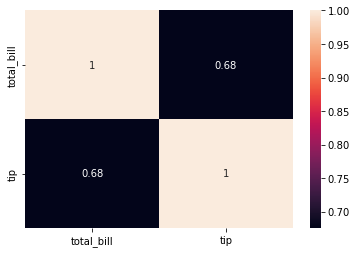

In [11]:
sns.heatmap(s,annot=True)

# relation of total bill and tip wrt male and female 

## add hue : for multi variate analysis

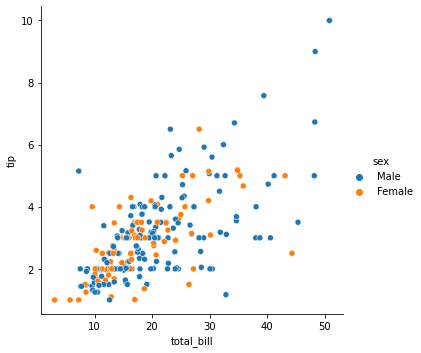

In [12]:
sns.relplot(x="total_bill",y="tip",data=tip,hue="sex");

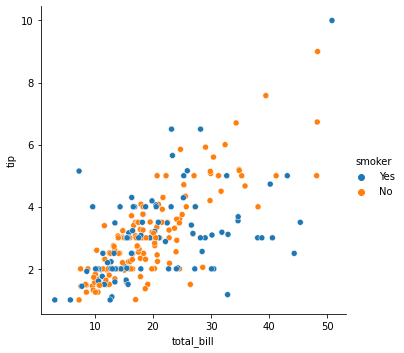

In [13]:
sns.relplot(x="total_bill",y="tip",data=tip,hue="smoker");

# add style 

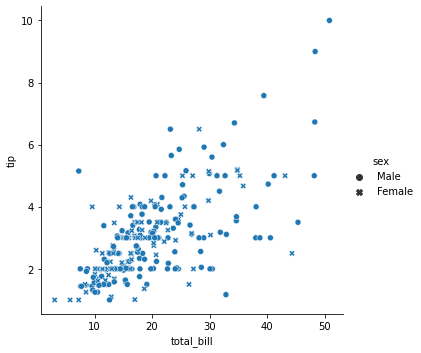

In [14]:
sns.relplot(x="total_bill",y="tip",data=tip,style="sex");

## add hue and style together 

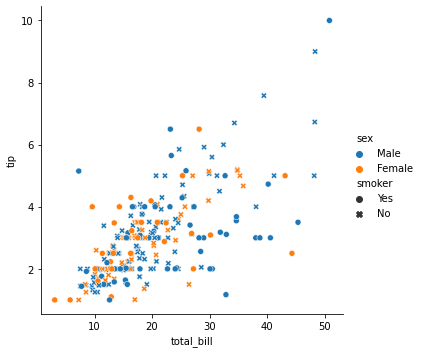

In [15]:
sns.relplot(x="total_bill",y="tip",data=tip,hue="sex",style="smoker");

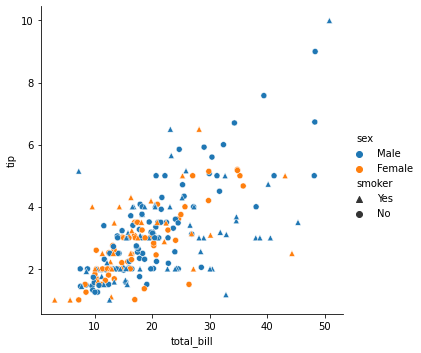

In [18]:
sns.relplot(x="total_bill",y="tip",data=tip,hue="sex",style="smoker",markers=["^","o"]);

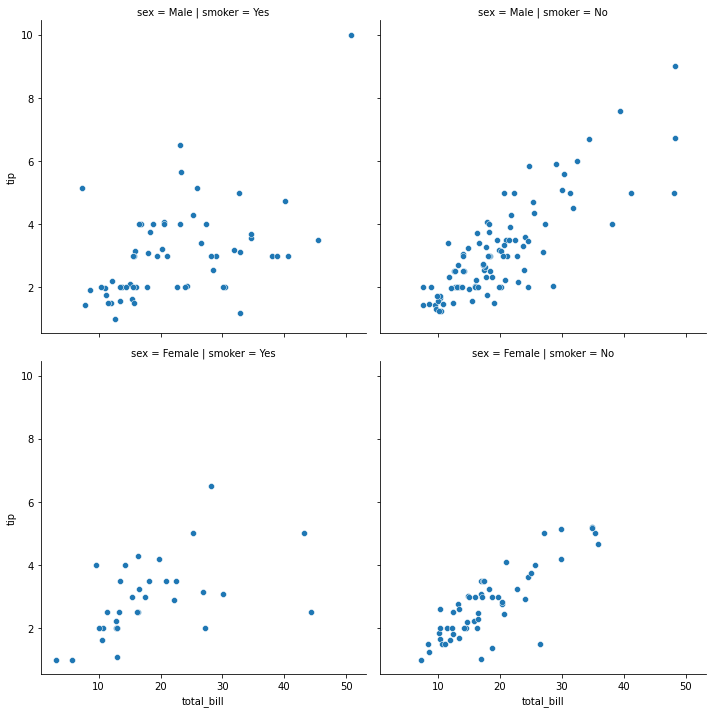

In [19]:
sns.relplot(x="total_bill",y="tip",data=tip,row="sex",col="smoker");

# scatterplot

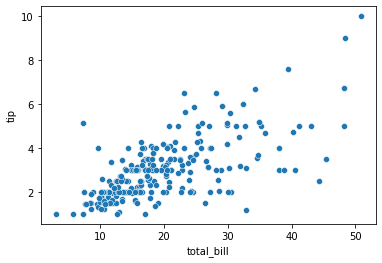

In [20]:
sns.scatterplot(x="total_bill",y="tip",data=tip);

# lineplot

In [21]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# lineplot:
 - relplot 
 - lineplot

## which family size generated the highest revenue

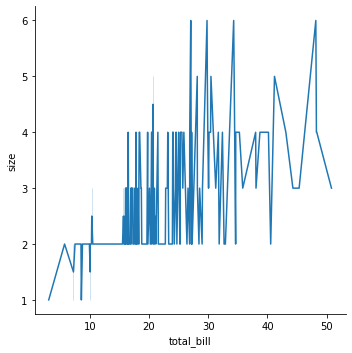

In [23]:
sns.relplot(x="total_bill",y="size",data=tip,kind="line");

In [24]:
tip[tip["size"]==6]

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
141,34.30,6.7,Male,No,Thur,Lunch,6
143,27.05,5.0,Female,No,Thur,Lunch,6
156,48.17,5.0,Male,No,Sun,Dinner,6


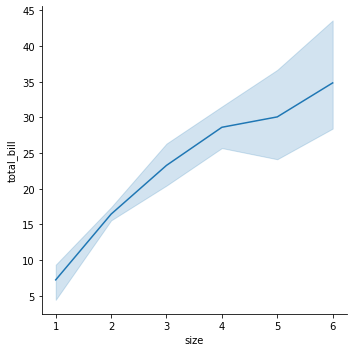

In [25]:
sns.relplot(x="size",y="total_bill",data=tip,kind="line");

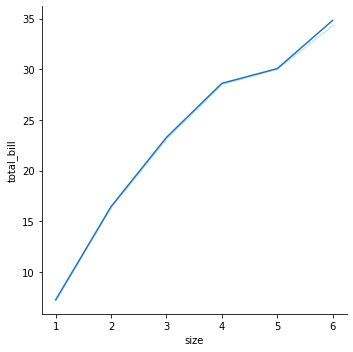

In [26]:
sns.relplot(x="size",y="total_bill",data=tip,kind="line",ci=False);

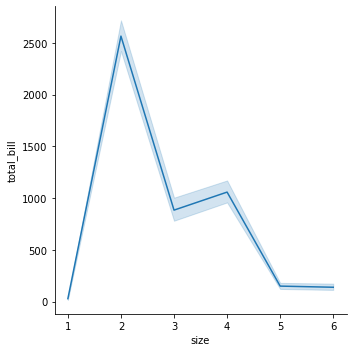

In [27]:
sns.relplot(x="size",y="total_bill",data=tip,kind="line",estimator=sum);

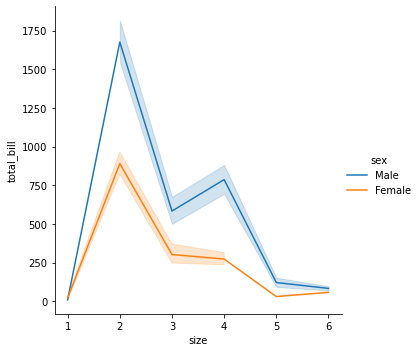

In [31]:
sns.relplot(x="size",y="total_bill",data=tip,kind="line",estimator=sum,hue="sex");

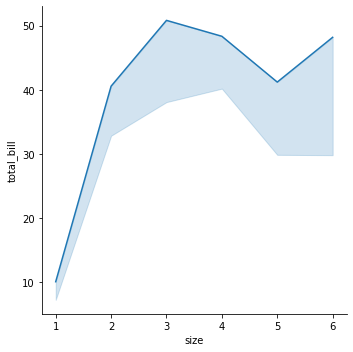

In [30]:
sns.relplot(x="size",y="total_bill",data=tip,kind="line",estimator=max)

In [28]:
tip.groupby(["size"])["total_bill"].agg(["mean","min","max","sum"])

,mean,min,max,sum
size,,,,
1,7.242500,3.07,10.07,28.97
2,16.448013,5.75,40.55,2565.89
3,23.277632,10.33,50.81,884.55
4,28.613514,16.49,48.33,1058.70
5,30.068000,20.69,41.19,150.34
6,34.830000,27.05,48.17,139.32


In [32]:
df=sns.load_dataset("flights")

In [33]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


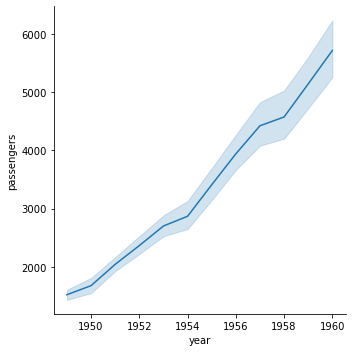

In [37]:
sns.relplot(x="year",y="passengers",data=df,kind="line",estimator=sum);

# categorical 

## count plot: 
- univariate
- categorical
- it tells the frequency of each category:same as value_counts


In [38]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# who visted most

In [39]:
tip["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

or 

<AxesSubplot:xlabel='sex', ylabel='count'>

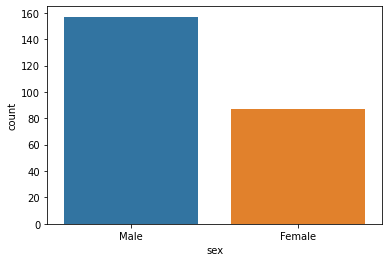

In [41]:
sns.countplot(x="sex",data=tip)

# how many male and female smoker and non smoker visted 

In [45]:
tip.groupby(["sex"])["smoker"].value_counts().to_frame().unstack()

smoker    
           No Yes
sex              
Male       97  60
Female     54  33

<AxesSubplot:xlabel='None-None', ylabel='sex'>

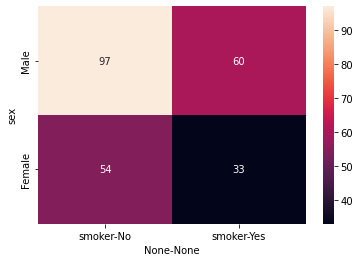

In [47]:
sns.heatmap(tip.groupby(["sex"])["smoker"].value_counts().to_frame().unstack(),annot=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

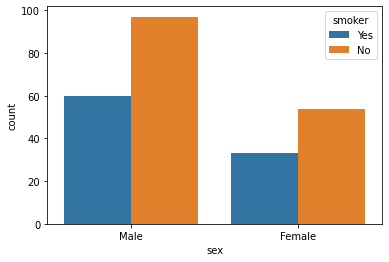

In [48]:
sns.countplot(x="sex",data=tip,hue="smoker")

In [49]:
tip.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


# which day was peak day 

<AxesSubplot:xlabel='day', ylabel='count'>

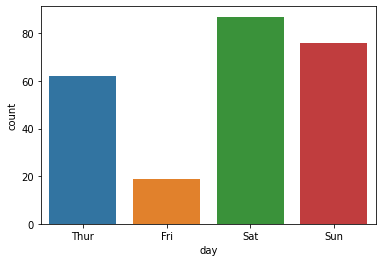

In [50]:
sns.countplot(x="day",data=tip)

<AxesSubplot:xlabel='day', ylabel='count'>

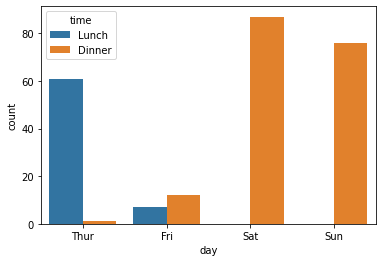

In [51]:
sns.countplot(x="day",data=tip,hue="time")

# barplot:

- catplot
- barplot
cat-numeric

# avg tip given by male and female 

In [52]:
tip.groupby(["sex"])["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

or 

<BarContainer object of 244 artists>

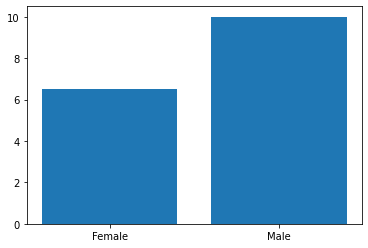

In [54]:
plt.bar(tip["sex"],tip["tip"])

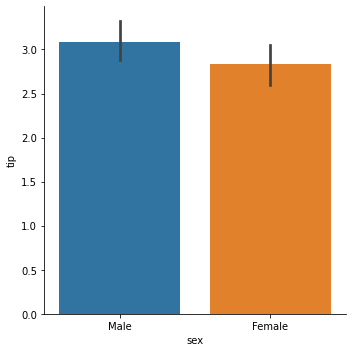

In [53]:
sns.catplot(x="sex",y="tip",data=tip,kind="bar")

# who generted highest business 

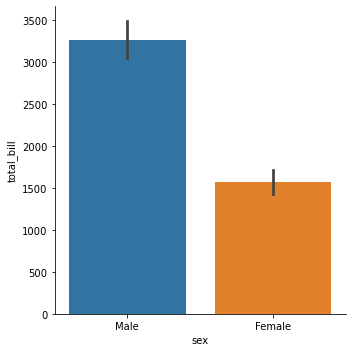

In [57]:
sns.catplot(x="sex",y="total_bill",data=tip,kind="bar",estimator=sum)

# which day found to be business day

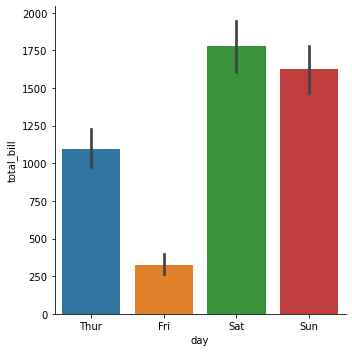

In [59]:
sns.catplot(x="day",y="total_bill",data=tip,estimator=sum,kind="bar")

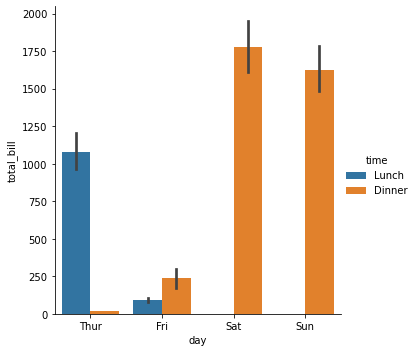

In [61]:
sns.catplot(x="day",y="total_bill",data=tip,estimator=sum,kind="bar",hue="time")

# strip plot:
cat- numeric

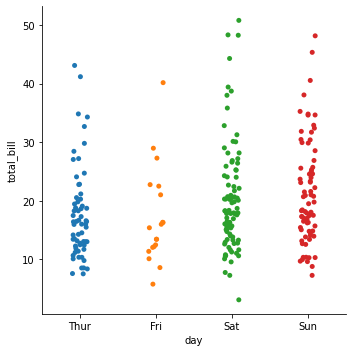

In [60]:
sns.catplot(x="day",y="total_bill",data=tip,estimator=sum)

# swarm : expanded form of strip

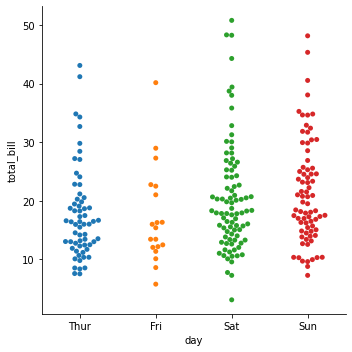

In [62]:
sns.catplot(x="day",y="total_bill",data=tip,estimator=sum,kind="swarm")

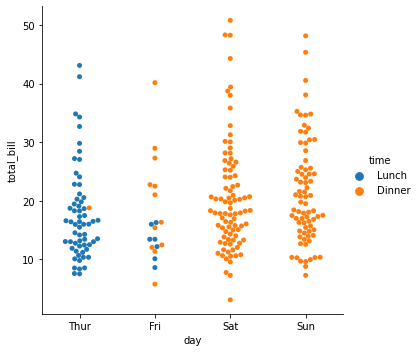

In [63]:
sns.catplot(x="day",y="total_bill",data=tip,estimator=sum,kind="swarm",hue="time")

# boxplot 
- from univariate
- from bivariate

- from univariate:numeric

<AxesSubplot:xlabel='tip'>

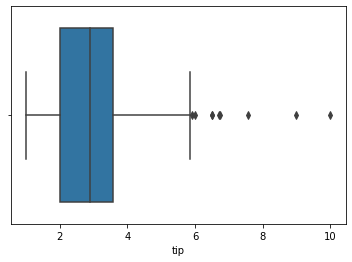

In [64]:
sns.boxplot(x="tip",data=tip)

 # bivariate: 
 - cat- numeric

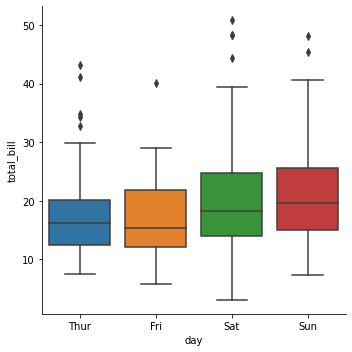

In [65]:
sns.catplot(x="day",y="total_bill",data=tip,kind="box")

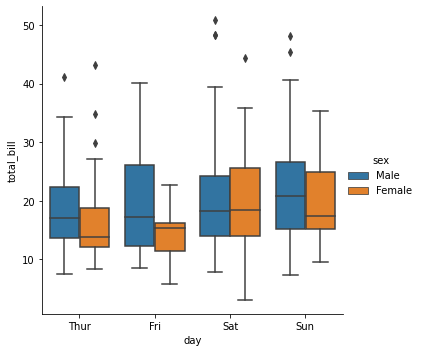

In [66]:
sns.catplot(x="day",y="total_bill",data=tip,kind="box",hue="sex")

# VIOLIN

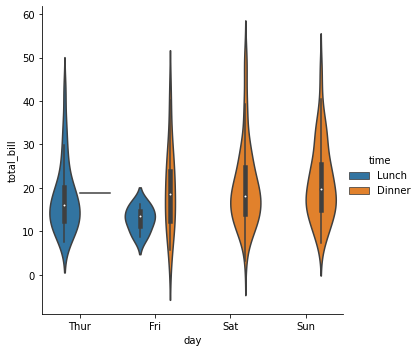

In [68]:
sns.catplot(x="day",y="total_bill",data=tip,kind="violin",hue="time")

# distplot

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

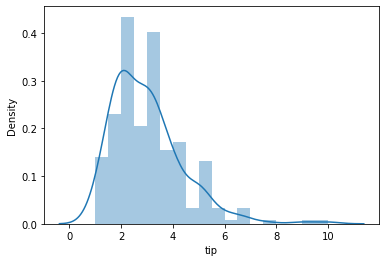

In [69]:
sns.distplot(tip["tip"])

In [70]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

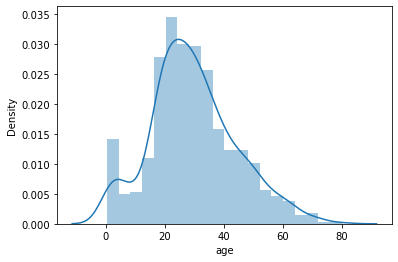

In [71]:
sns.distplot(df['age'])

In [73]:
df_s=df[df["survived"]==1]
df_ns=df[df["survived"]==0]

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


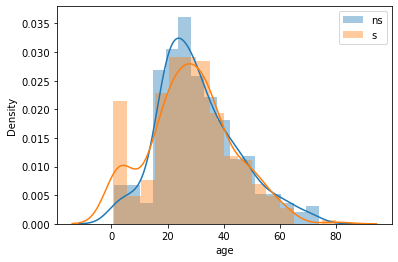

In [77]:
sns.distplot(df_ns["age"],label="ns")
sns.distplot(df_s["age"],label="s")
plt.legend()